## 单行 for 循环的使用

In [ ]:
# 简化代码 
segment_ls = ["pelvis","leg" ]
quat_ls = ["_q0","_q1","_q2","_q3"]
segmet_quat_ls = [segment_ls[0]+quat_ls[0],segment_ls[0]+quat_ls[1],segment_ls[0]+quat_ls[2],segment_ls[0]+quat_ls[3]]
segmet_quat_ls

In [ ]:
# 以下是简化后的代码：
segments = ["pelvis", "leg"]
quats = ["_q0", "_q1", "_q2", "_q3"]
segment_quats = [seg + quat for seg in segments for quat in quats]
print(segment_quats)

# @阿帅批
# 使用了单行for循环
# 简化了命名，列表使用复数命名，
# 列表中的元素使用单数甚至是缩写

chatGPT 解释
这段代码创建了一个名为 segments 的列表，其中包含字符串 "pelvis" 和 "leg"。它还创建了一个名为 quats 的列表，其中包含字符串 "_q0"、"_q1"、"_q2" 和 "_q3"。
列表推导式 segment_quats = [seg + quat for seg in segments for quat in quats] 通过将 segments 中的每个元素与 quats 中的每个元素连接而创建一个新列表。生成的列表包含字符串 "pelvis_q0"、"pelvis_q1"、"pelvis_q2"、"pelvis_q3"、"leg_q0"、"leg_q1"、"leg_q2" 和 "leg_q3"。
最后，代码打印了 segment_quats 列表。

## 遍历文件夹方法

In [ ]:
import os
path = input("请输入文件路径：")
os.scandir() # 不能做到遍历，但能够方便的查找当前文件下的文件、文件名
for i in os.scandir(path):
    if i.is_dir():
        print(i.path)
    print("------")
    if i.is_file():
        print(i.name)

# os.walk 能够对当前文件夹进行遍历，并返回列表
for dirpath, dirnames, filenames in os.walk(path):
    #print(dirpath)
    #print("-----")
    #print(dirnames)
    print(f"dirpath:\n{dirpath}\n")
    print(f"dirnames:\n{dirpath}\n")
    print(f"dirnames:\n{filenames}")
    print("-----\n\n")

-0.07142857143090686 2.3685714285744046 0.039999999997922364
拟合参数: [-0.07142857  2.36857143  0.04      ]


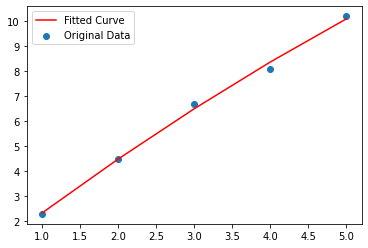

In [3]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 准备数据
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.3, 4.5, 6.7, 8.1, 10.2])

# 定义拟合函数
def func(x, a, b, c):
    return a * x**2 + b * x + c

# 初始猜测参数
initial_guess = [1, 1, 1]

# 进行曲线拟合
popt, pcov = curve_fit(func, x, y, p0=initial_guess)

# 输出拟合结果
print("拟合参数:", popt)

# 绘制拟合曲线和原始数据
plt.scatter(x, y, label='Original Data')

# 列表中加 * 可以将列表中的元素一个个拆解出来
plt.plot(x, func(x, *popt), 'r-', label='Fitted Curve')
plt.legend()
plt.show()

## reindex 和 reset_index 的区别

In [5]:
import pandas as pd
# reindex 是重建索引
df = pd.DataFrame({"p1-c":[1,2,3]},index=[1,2,3])
print(df)

   p1-c
1     1
2     2
3     3


In [11]:
reindex = [3,2,1]
# 需要重新赋值给新的索引才可以
new_df = df.reindex(reindex)
print(new_df)

   p1-c
3     3
2     2
1     1


In [14]:
# reset_index 是重置索引，将原来的索引提取出来
import pandas as pd
df = pd.DataFrame({"BMI":[18,22,33],
                   "Grade":["Good","Great","Bad"]},
                   index = ["Fit001","Fit002","Fit003"])
df

,BMI,Grade
Fit001,18,Good
Fit002,22,Great
Fit003,33,Bad


In [21]:
# reset_index 可以将原来的 index 提取出来
new_df_with_index = df.reset_index()
print("将Index 提取出来：")
print(new_df_with_index)
print("\n")
new_df_without_index= df.reset_index(drop=True)
print("直接将 Index 剔除：")
print(new_df_without_index)

将Index 提取出来：
    index  BMI  Grade
0  Fit001   18   Good
1  Fit002   22  Great
2  Fit003   33    Bad


直接将 Index 剔除：
   BMI  Grade
0   18   Good
1   22  Great
2   33    Bad


## 正则表达式 re.search()

In [7]:
import re
filename = "admi_20230424丁冠宏-步频100-4来回-鞋垫41-604F-V3.95-002_202304241803284520.csv"
regex = r".*_(.*_.*.csv)"

# 对容易报错的地方增加 try except
# 不影响程序运行
try:
    match = re.search(regex,filename)
    if match:
        extracted_filename = match[1]
        print(extracted_filename)
    else:
        print("未匹配到文件名")
# 能够把 re 的 error 输出出来
except re.error as e:
    print(f"正则表达式错误:{e}")

20230424丁冠宏-步频100-4来回-鞋垫41-604F-V3.95-002_202304241803284520.csv


In [8]:
## 异常 raise 以及 assert 的用法

In [18]:
def BMI(height,weight):
    if height<0 or height>2.7:
        # 使用 raise 需要制定异常类型
        # 搭配 ValueError 使用
        # 除此还可以搭配 TypeError、IndexError、AttributerError
        # 
        raise ValueError("身高需要大于0m，单位为m")
    BMI = weight/height/height
    return print(f"当前BMI为:{BMI:.1f}")

BMI(170,60)

ValueError: 身高需要大于0m，单位为m

In [33]:
# 类不像函数，声明后没有括号，没有参数
class BMI:
    def __init__(self, height, weight):
        # assert 相较于 raise 少了 if 的判断，直接判断加报错
        # assert 用于调试和报错
        assert height>0 and height<2.7, "身高应该大于 0m，小于2.7m"
        self.height = height
        self.weight = weight


In [34]:
yough_BMI = BMI(40,50)

AssertionError: 身高应该大于 0m，小于2.7m

## if 的使用

根据 BMI 划分超重、肥胖和极度肥胖

超重：25~29.9 kg/㎡

肥胖：≥ 30 kg/㎡

极度肥胖：≥ 40 kg/㎡

In [49]:
def BMI(height,weight):
    # 先判断身高大范围，以及将身高的厘米转换为m
    if height>2.7:
        height_m = height/100
    elif 0<height<2.7:
        height_m = height
    elif height<0:
        raise ValueError("身高需要大于0")

    BMI = weight/height_m/height_m

    if 0<BMI<25:
        print(f"BMI为{BMI:.1f}, 正常")
    elif 25<=BMI<30:
        print(f"BMI为{BMI:.1f},超重")
    elif 30<=BMI<40:
        print(f"BMI为{BMI:.1f},肥胖")
    elif 40<=BMI:
        print(f"BMI为{BMI:.1f},极度肥胖")


In [4]:
joint = "Hip"
sides = ["Right", "Left"]
angles = ["Flexion/Extension", "Abduction/Adduction", "Internal/External Rotation"]

for side in sides:
    for angle in angles:
        var_name = side + " " + joint + " " + angle
        print(var_name)
        #exec(var_name + " = " + '"' + var_name + '"' )

Right Hip Flexion/Extension
Right Hip Abduction/Adduction
Right Hip Internal/External Rotation
Left Hip Flexion/Extension
Left Hip Abduction/Adduction
Left Hip Internal/External Rotation


## 使用单行 for 循环简化代码
详情见 InShoes/20230420_XsensMVNGaitAnalysis.ipynb

In [ ]:
# 简化前
side  = "Right"
joint = "Hip"
Right_Flexion = side + " "+ joint + " "+ "Flexion/Extension"
Right_Abduction = side+ " "+ joint + " "+ "Abduction/Adduction"
Right_Internal = side+ " "+ joint + " "+ "Internal/External Rotation"

side = "Left"
Left_Flexion = side + " "+ joint + " "+ "Flexion/Extension"
Left_Abduction = side+ " "+ joint + " "+ "Abduction/Adduction"
Left_Internal = side+ " "+ joint + " "+ "Internal/External Rotation"


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,3),dpi=500)

Left_norm_df[Left_Flexion].plot(ax=axs[0],color="pink",linestyle = "--",label="患侧")
Left_norm_df[Left_Abduction].plot(ax=axs[1],color="pink",linestyle = "--",label="患侧")
Left_norm_df[Left_Internal].plot(ax=axs[2],color="pink",linestyle = "--",label="患侧")

Right_norm_df[Right_Flexion].plot(ax=axs[0],label="健侧")
Right_norm_df[Right_Abduction].plot(ax=axs[1],label="健侧")
Right_norm_df[Right_Internal].plot(ax=axs[2],label="健侧")

In [ ]:
# 简化后
def JointanglesPlot(Left_norm_df,Right_norm_df,joint,Affected_side):

    # 确定不同关节对应的术语
    if joint in ["Hip","Knee"]:
        actions = ["Flexion/Extension","Abduction/Adduction","Internal/External Rotation"]
    else:
        actions = ["Dorsiflexion/Plantarflexion","Abduction/Adduction","Internal/External Rotation"]

    # 将左右、关节以及不同平面的运动拼接成专业的术语
    sides = ["Left","Right"]
    sides_joint_actions = [side + " "+ joint + " "+ action for side in sides for action in actions]

    # 绘制画布
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,3),dpi=500)

    # 制定左右腿那个是患侧，使用不同的绘制方式
    Affected_side_plot = ["pink","--","患侧"]
    Healthy_side_plot = ["green","-","健侧"]
    if Affected_side == "Left":
        left_color, left_linestyle, Left_label = Affected_side_plot
        right_color, right_linestyle, right_label = Healthy_side_plot 
    elif Affected_side == "Right":
        right_color, right_linestyle, right_label = Affected_side_plot 
        left_color, left_linestyle, Left_label = Healthy_side_plot 
    else:
        raise ValueError("请制定患侧腿：Left或者Right")


    # 循环绘制关节每个平面左右腿的数据
    for i, sides_joint_action in enumerate(sides_joint_actions):
        if i <= 2:
            Left_norm_df[sides_joint_action].plot(ax=axs[i],
                                                  color=left_color,linestyle = left_linestyle,label=Left_label)
        else:
            Right_norm_df[sides_joint_action].plot(ax=axs[i%3],
                                                   color=right_color,linestyle=right_linestyle,label=right_label)

## Pandas DataTime
了解一个函数就要了解：
- 如果是数据要了解数据格式
- 增、删、查、改、算 
  - 查：是指如何索引
  - 算：主要是指如何运算，比如pandas 时间的相减
- 如果是类，类包含哪些函数？
  - 如这里的 dt.hour
- 函数有哪些参数？
  - 比如这里 format、freq

In [9]:
# 增：增加 1个，如何定义一个 datetime
import pandas as pd

dt = pd.to_datetime("2020-01-01")

# 转换后类型为时间戳
print(type(dt))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [18]:
# dt 属性有 dt.year dt.month dt.day dt.hour
# dt 是年、月、日、时、分、秒、分秒的属性
# 就是class 中的属性
dt.year 
dt.month 
dt.day 
dt.hour
dt.hour
dt.minute
dt.second
dt.microsecond

0

In [54]:
df.shape[0]

5

In [74]:
# 增：如何增加 n 个时间，并确定时间间隔
import pandas as pd
data = pd.DataFrame({})
data["date_range"] = pd.date_range("2022-04-01 10:00:00",periods=3,freq="10ms")
data["date_range"]

# 使用 harzt 代替 ms
hertz = 100
freq = f"{1000/hertz}ms"
data["date_range"] = pd.date_range("2022-04-01 10:00:00",periods=3,freq=freq)
data["date_range"]

0   2022-04-01 10:00:00.000
1   2022-04-01 10:00:00.010
2   2022-04-01 10:00:00.020
Name: date_range, dtype: datetime64[ns]

In [ ]:
# 删：如何删除一个 Datetime？

In [62]:
# 改：如何将字符串更改为 datetime
df = pd.DataFrame({
    "date":["2022-01-01","2022-01-01","2022-01-02","2022-01-03","2022-01-04"],
    "value":["10","10","20","30","40"]
})

print(">> 转换前的 date type 格式：")
print(type(df["date"]))
print(">> 转换后的 date 的dtype格式:")
print(type(df["date"].dtype))
try:
    df["date"].iloc[2]-df["date"].iloc[0]
except:
    print("转换为 datetime 之后能够直接将两个数据进行相减，获取时间间隔")
    print("\n如果不转换则直接报错：")
    print("TypeError: unsupported operand type(s) for -: 'str' and 'str'")

print("\n")

# 转换为时间格式
df["date"] = pd.to_datetime(df["date"])
print(">> 转换后的 date type 格式:")
print(type(df["date"]))
print(">> 转换后的 date dtype 格式:")
print(df["date"].dtype)

print(">> 使用 pandas df.to_datetime 转换前后 dytpe 格式发生了转换")
print(">> datetime 运算后的结果为：")
print(df["date"].iloc[2]-df["date"].iloc[0])

# Numpy 支持 float、int、bool、timedelta64[ns] 和 datetime64[ns]
# 但 Numpy 不支持带有时区信息的 datetimes


>> 转换前的 date type 格式：
<class 'pandas.core.series.Series'>
>> 转换后的 date 的dtype格式:
<class 'numpy.dtype[object_]'>
转换为 datetime 之后能够直接将两个数据进行相减，获取时间间隔

如果不转换则直接报错：
TypeError: unsupported operand type(s) for -: 'str' and 'str'


>> 转换后的 date type 格式:
<class 'pandas.core.series.Series'>
>> 转换后的 date dtype 格式:
datetime64[ns]
>> 使用 pandas df.to_datetime 转换前后 dytpe 格式发生了转换
>> datetime 运算后的结果为：
1 days 00:00:00


In [69]:
import numpy as np
df["date"].values.astype(np.int64)

array([1640995200000000000, 1640995200000000000, 1641081600000000000,
       1641168000000000000, 1641254400000000000])

## 自由加速度以及加速度转换

chatGPT 4 给出的答案，有待验证：https://poe.com/s/2w2EEUaPok6kufqaAXk7
IMU (Inertial Measurement Unit) 是一种传感器设备，通常包含加速度计、陀螺仪和磁力计，用于测量物体的线性加速度、角速度和地磁场。在这里，我们将关注加速度计如何测量自由加速度。
自由加速度是指物体在没有受到任何其他力（如摩擦力或空气阻力）作用下的加速度。在 IMU 中，加速度计测量的加速度包括重力加速度（g）和自由加速度（a_f）。我们可以通过以下公式计算自由加速度：
a_f = a_m - g
其中：
a_f 是自由加速度
a_m 是加速度计测量的加速度
g 是重力加速度，通常取值为 9.81 m/s²
为了计算自由加速度，我们需要首先确定 IMU 的姿态，然后将加速度计的原始测量值转换为地球坐标系。下面是一个使用 Python 和 NumPy 库的示例代码：
python

```python
import numpy as np

def calculate_free_acceleration(raw_acceleration, orientation, gravity=9.81):
    # 计算重力在 IMU 坐标系中的分量
    gravity_vector = np.array([0, 0, -gravity])
    gravity_imu = np.dot(orientation, gravity_vector)
    
    # 计算自由加速度
    free_acceleration = raw_acceleration - gravity_imu
    return free_acceleration
    

### 示例加速度计数据（假设已经转换为 g 值,也就是 m/s²）
raw_acceleration = np.array([0.1, 0.2, 9.9])

### 示例 IMU 姿态（假设已经转换为旋转矩阵）
orientation = np.identity(3)  # 假设 IMU 处于水平静止状态

### 计算自由加速度
free_acceleration = calculate_free_acceleration(raw_acceleration, orientation)
print("Free acceleration: ", free_acceleration)
现在，我们已经计算出了自由加速度，我们可以使用它来计算加速度。事实上，在我们的公式中，已经给出了如何从自由加速度计算加速度：
a_m = a_f + g
这个公式已经是加速度计算的公式了。下面是一个简单的 Python 代码示例：
python

def calculate_acceleration(free_acceleration, gravity=9.81):
    # 计算加速度
    acceleration = free_acceleration + np.array([0, 0, gravity])
    return acceleration

# 使用自由加速度计算加速度
acceleration = calculate_acceleration(free_acceleration)
print("Acceleration: ", acceleration)
这些代码示例展示了如何根据加速度计数据计算自由加速度，以及如何根据自由加速度计算加速度。请注意，这些示例假设 IMU 的姿态已知。在实际应用中，您可能需要使用姿态估计算法（如四元数、欧拉角或旋转矩阵）来确定 IMU 的姿态。

In [23]:
from scipy.spatial.transform import Rotation as R
euler_angles = (0,0,0)
r = R.from_euler("zyx", euler_angles,degrees=True)
q_LS = r.as_quat()
q_SL = (0,-0,-0,-0)
x_s = [0,0,10]
X_L = q_LS * x_s * q_SL

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

## 传感器到大地坐标系的转换

In [9]:
# 以下代码还不对可以转换传感器的方向到大地

# https://movella.my.site.com/XsensKnowledgebase/s/article/Orientation-output-specifications?language=zh_CN
from scipy.spatial.transform import Rotation as R
import numpy as np
import quaternion

euler_angles = (0, 0, 0)
r = R.from_euler("zyx", euler_angles, degrees=True)
q_LS = r.as_quat()

q_SL = np.quaternion(1, 0, 0, 0)  # 四元数的逆为实部相同但虚部取负

x_s = np.array([0, 8, 2])  # 将向量转换为四元数
q_x = np.quaternion(0, x_s[0], x_s[1], x_s[2])

X_L = q_LS * q_x * q_SL.conj()  # 四元数乘法


print(X_L)

[quaternion(0, 0, 0, 0) quaternion(0, 0, 0, 0) quaternion(0, 0, 0, 0)
 quaternion(0, 0, 8, 2)]


# 使用 matplotlib 生成 html 网页

In [ ]:
# 安装 mpld3
!pip install mpld3

In [3]:
os.getcwd()

'/Users/wangshuaibo/Documents/ScriptsofShuai/Notes'

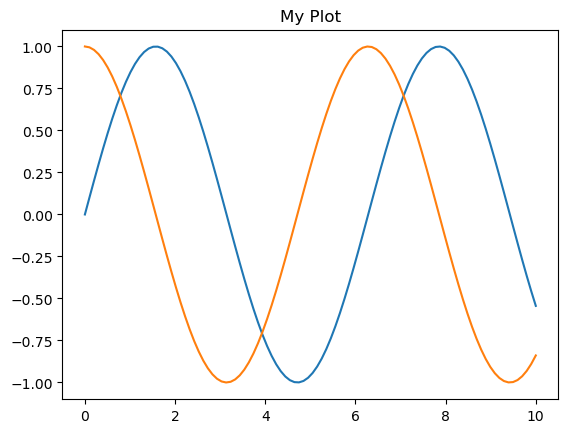

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import mpld3
from mpld3 import plugins

fig, ax = plt.subplots()
x = np.linspace(0,10,100)
y = np.sin(x)
z = np.cos(x)
line1, = ax.plot(x,y,label="sin")
line2, = ax.plot(x,z,label="cos")
ax.set_title("My Plot")

# 创建交互式图插件
handles, labels = ax.get_legend_handles_labels() # 获取图例句柄和标签
interactive_legend = plugins.InteractiveLegendPlugin(handles,labels) # 创建交互式图例插件

# 将插件连接到图形上
plugins.connect(fig, interactive_legend,plugins.MousePosition(fontsize=14)) 
# Mouseposition 可以帮助显示曲线的具体数值

mpld3.save_html(fig, "myplot.html")

In [ ]:
## 转换四元数为 .sto 数据

文件共包含 0 行
头文件包含在前 5 行
头文件为：[]
.sto中的内容同样为字符串<class 'str'>
.sto 的格式为:
'0\t0.5105588968224414,0.4570645371936038,-0.6688411554744984,0.2882240976375608\t0.5150999034850758,0.4570350111478301,-0.6567566498355804,0.3073463696084815\t0.03454401184498087,0.7261895448153499,-0.1214479765864425,0.675800151841939\t0.07904786410535811,0.6845873174285211,-0.03532923132427412,0.7237703264229874\t0.6699975613469359,-0.003147228472911289,-0.7408105394556442,-0.04788640071602394\t0.7026096898493198,-0.04427423704255651,-0.690916850681173,-0.1643572970967575\t0.2634654183007522,-0.9267096858071121,0.2489177150420914,-0.09917208644128243\t0.04061058015653765,0.1701648539050346,0.9512424323165625,0.2540325534952116\n'


In [136]:
import pandas as pd
columns = ["time"] + [segment + quat for segment in ["Pelvis","Leg","Arm"] for quat in ["_q0","_q1","_q2","_q3"]]
df = pd.DataFrame([[0,1,2,3,4,5,6,7,8,9,10,11,12],
                   [0,2,2,3,4,5,6,7,8,9,10,11,12]],
                  columns=columns)
# 定义一个函数，用于将每个分组的数据转换为字符串列表
def join_quaternions(group):
    return ','.join(map(str, group.values.tolist()[0]))

# 按 segment 分组
pelvis_group = df[columns[:4]]
leg_group = df[columns[4:8]]
arm_group = df[columns[8:]]

# 将每个分组的数据转换为字符串列表
pelvis_string = join_quaternions(pelvis_group)
leg_string = join_quaternions(leg_group)
arm_string = join_quaternions(arm_group)

# 将所有分组的字符串用 `\t` 连接
result = f"{pelvis_string}\t{leg_string}\t{arm_string}\n"
print(repr(result))
type(pelvis_string)


'0,1,2,3\t4,5,6,7\t8,9,10,11,12\n'


str

In [137]:
line_len = (df.shape[1]+1) * 2

def line_df_to_sto(line_len,row=0):
    line = [None] * line_len
    for i in range(line_len):
        # 此处也需要修改
        line[0] = df.iloc[row,0]
        if i%2 != 0 and (i-1)%8 != 0:
            line[i] = ","
        elif (i-1)%8 == 0:
            line[i] = "\t"
        elif i != 0 :
            #print(i)
            line[i] = df.iloc[row,int(i/2-1)]

    # 将列表转换为字符串
    result = ""
    for n in line:
        result += str(n)
    return result.strip("\t") + "\n"


In [144]:
harzt = 100
# 将hartz 填入表头
metadata = f'''DataRate={harzt:.6f}
DataType=Quaternion
version=3
OpenSimVersion=4.4-2022-10-11-798caa8
endheader'''

header_list = ["time"] + [segment+"_imu" for segment in ["Pelvis","Leg","Arm"]]
header_str = "\t".join(header_list) + "\n"


In [145]:
header

'time\tPelvis_imu\tLeg_imu\tArm_imu'

In [148]:
with open("test_quat.sto", "w") as f:
    # 先写属性信息
    f.write(metadata)
    f.write(header_str)
    for j in range(df.shape[0]):
        sto_line = line_df_to_sto(line_len,row=j)
        f.write(sto_line)
    

In [147]:
os.getcwd()

'/Users/wangshuaibo/Documents/ScriptsofShuai/Notes'

# 使用 Open 函数读取 csv 文件

In [13]:
import numpy as np
csv_path = r"/Users/wangshuaibo/Library/CloudStorage/OneDrive-bsu.edu.cn/Archive/代码_OpenSense/OpenSense_Python/OpenSenseExample/OpenSenseExample_Original_20230518/IMUData/MT_012005D6_009-001_00B421E6.txt"
data = []
with open(csv_path) as f:
    count = 0
    for line in f:

        
        if count > 4:
            row = line.strip().split("\t")
            #print(row)
            data.append(row)
        count += 1
data = np.array(data)

import pandas as pd
data_df = pd.DataFrame(data[1:,:],columns=data[0,:])
data_df

,PacketCounter,SampleTimeFine,Year,Month,Day,Second,UTC_Nano,UTC_Year,UTC_Month,UTC_Day,...,Acc_Z,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,00472,,,,,,,,,,...,-8.503300,-0.938789,0.344369,0.009194,0.303103,0.813023,0.497114,0.163716,0.469472,-0.867636
1,00473,,,,,,,,,,...,-8.486458,-0.938790,0.344369,0.009161,0.303100,0.813064,0.497048,0.163719,0.469400,-0.867675
2,00474,,,,,,,,,,...,-8.547919,-0.938785,0.344381,0.009175,0.303123,0.813073,0.497019,0.163704,0.469375,-0.867691
3,00475,,,,,,,,,,...,-8.504867,-0.938774,0.344410,0.009185,0.303168,0.813104,0.496942,0.163683,0.469301,-0.867735
4,00476,,,,,,,,,,...,-8.489519,-0.938775,0.344408,0.009171,0.303165,0.813124,0.496911,0.163682,0.469268,-0.867753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,02899,,,,,,,,,,...,-8.441149,0.969667,0.243085,0.025588,0.195244,-0.833274,0.517237,0.147054,-0.496552,-0.855459
2428,02900,,,,,,,,,,...,-8.465569,0.969608,0.243308,0.025715,0.195127,-0.832418,0.518658,0.147599,-0.497877,-0.854595
2429,02901,,,,,,,,,,...,-8.392715,0.969550,0.243507,0.026029,0.194874,-0.831518,0.520193,0.148315,-0.499281,-0.853652
2430,02902,,,,,,,,,,...,-8.454162,0.969505,0.243669,0.026203,0.194676,-0.830666,0.521627,0.148870,-0.500619,-0.852771


In [9]:
# 进行字符串的拼接
words = "hello world!"

for i in range(10):
    '''
    if i%2 == 0:
        sep = "\t"
    else:
        sep = "\n"
    '''
    # for 以及 if 语句变为单行之后，就没有 :
    sep = "\t" if i%2 ==0 else "\n"
    words = words + sep
    print(repr(words))

'hello world!\t'
'hello world!\t\n'
'hello world!\t\n\t'
'hello world!\t\n\t\n'
'hello world!\t\n\t\n\t'
'hello world!\t\n\t\n\t\n'
'hello world!\t\n\t\n\t\n\t'
'hello world!\t\n\t\n\t\n\t\n'
'hello world!\t\n\t\n\t\n\t\n\t'
'hello world!\t\n\t\n\t\n\t\n\t\n'


# Gaitpy 学习笔记

## detrend 趋势

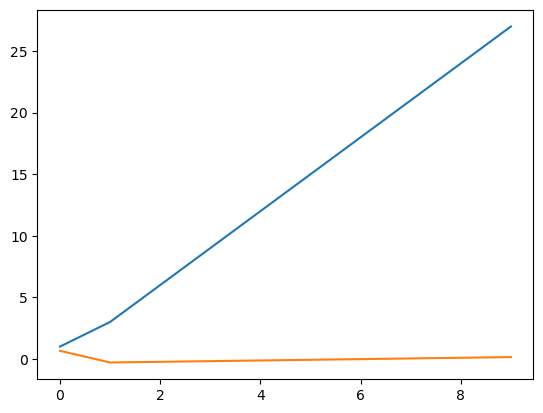

In [8]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt 

data = [1,3,6,9,12,15,18,21,24,27]
detrended_data = signal.detrend(data)
plt.plot(np.arange(0,len(data)),data,detrended_data)